In [166]:
infolder='D:\Ameyem Office\Projects\mrinmay-project'
file='Test_3.5C.xlsx'
import pandas as pd
import os
logdf=pd.read_excel(os.path.join(infolder, file))

df=logdf[['DEPTH','Value']]
# df.tail()

In [167]:
df.Value.min()
df = df[df.Value != logdf.Value.min()]

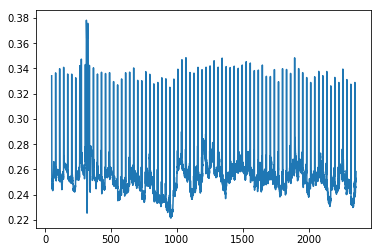

In [169]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(df.DEPTH,df.Value)
plt.show()

In [193]:
# z=df.Value.values.copy()
# # z[:]=df.Value.mean()
# # z
# z[:]=np.mean(df.Value.rolling(100).max())
np.mean(df.Value.rolling(100).max())

0.30276115529510633

In [178]:
spikedf=df[df.Value>np.mean(df.Value.rolling(100).max())]
# np.append([0],spikedf.DEPTH.values)
# mind=np.append([0],spikedf.DEPTH.values)
# maxd= np.append(spikedf.DEPTH.values,df.DEPTH[-1:])



# df.head(10),maxd[0]
mind,maxd=spikedf.DEPTH.values,np.append(spikedf.DEPTH.values[1:],df.DEPTH[-1:])


In [179]:
# df.DEPTH[-1:].values
# spikedf.DEPTH.values[-10:], maxd[-10:]
mind[-10:],maxd[-10:]

(array([2259.54, 2289.3 , 2289.46, 2289.62, 2319.7 , 2319.86, 2320.02,
        2350.26, 2350.42, 2350.58]),
 array([2289.3 , 2289.46, 2289.62, 2319.7 , 2319.86, 2320.02, 2350.26,
        2350.42, 2350.58, 2359.22]))

In [180]:
i=-3#df.DEPTH>mind[i] and 
ind=(df.DEPTH>mind[i]+0.001) & (df.DEPTH<maxd[i]-0.001)
df['New_log'][ind]=df[ind].Value.max()
len(mind),len(maxd),mind[i],maxd[i],df[ind]
# mind[-10:],maxd[-10:]
# ind

(363, 363, 2350.26, 2350.42, Empty DataFrame
 Columns: [DEPTH, Value, New_log]
 Index: [])

In [200]:
def max_log(df,mind,maxd):
    df['New_log']=df['Value'].copy()
    for i in range(len(mind)):
        ind=(df.DEPTH>mind[i]+0.001) & (df.DEPTH<maxd[i]-0.001)        
        try:
            df['New_log'][ind]=df[ind].Value[2:-2].max()
        except:
            df['New_log'][ind]=df[ind].Value.max()
    return df

In [201]:
df=max_log(df,mind,maxd)

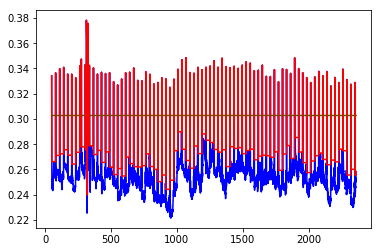

In [203]:
import numpy as np
# z = np.polyfit(df.DEPTH.values, df.Value.values, 5)
# p = np.poly1d(z)
plt.plot(df.DEPTH, df.Value, 'b-', label='data')
plt.plot(df.DEPTH.values, z, 'g-',label='fit')
plt.plot(df.DEPTH.values, df.New_log, 'r-',label='fit')
# plt.plot(df.DEPTH.values, df.Value.rolling(100).max(), 'r-',label='fit' )
# df.write_excel()
# df.write_excel(os.path.join(infolder, 'test_3c.xlsx'))

In [204]:
df.to_excel(os.path.join(infolder, 'test_3c1.xlsx'))